###  LOGISTIC REGRESSION PROBLEM

**GOAL OF ANALYSIS**

To develop a predictive model to predict which hospitalized diabetic patients will be readmitted for their condition at a later date.

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Read Test and Train
diabetes = pd.read_csv("diabetic_patient.csv")

In [11]:
# Copy of original data
train_original = diabetes.copy()

In [12]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
"dimension of diabetes data: {}".format(diabetes.shape)

'dimension of diabetes data: (768, 9)'

__The diabetes dataset consists of 768 data points, with 9 features __

In [14]:
# Checking for duplicate data.
diabetes["is_duplicate"]= diabetes.duplicated()

In [15]:
diabetes.groupby('is_duplicate').size()

is_duplicate
False    768
dtype: int64

No Duplicated data found

In [16]:
# Hence, No duplicated data found
diabetes.drop("is_duplicate",axis = 1,inplace= True)

In [18]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome is our target variable, "0" means patient do not have diabetes and "1" means patient have diabetes.

500 patient's do not have diabetes, while 268 patient's have diabetes 

In [19]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.310613,4.765945,4.237799,2.352462,2.434924,3.448532,0.359894,3.447765,0.348958
std,0.769830,0.255283,0.206918,1.555689,2.410031,0.213884,0.182891,0.320199,0.476951
min,0.000000,4.043051,3.655840,0.000000,0.000000,2.953242,0.075107,3.044522,0.000000
25%,0.693147,4.595120,4.127134,0.000000,0.000000,3.306887,0.218131,3.178054,0.000000
50%,1.386294,4.762174,4.276666,3.178054,3.448852,3.465736,0.316633,3.367296,0.000000
75%,1.945910,4.943422,4.382027,3.496508,4.853976,3.600048,0.486277,3.713572,1.000000
max,2.890372,5.293305,4.553772,3.957570,5.419871,3.861277,0.781268,4.169143,1.000000


In [20]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [21]:
# Checking for Missing Data.
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing fields in Data. 

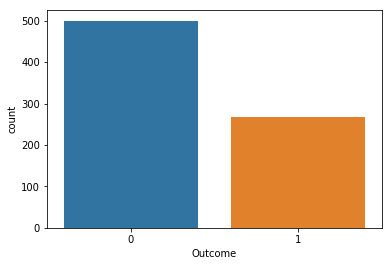

In [22]:
sns.countplot(diabetes['Outcome'],label="Count")

In [23]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
diabetes['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

So, here we have unbalanced classes

In [26]:
# Check Number of unique values in each Column.
for k, v in diabetes.nunique().to_dict().items():
    print('{}={}'.format(k,v))

Pregnancies=17
Glucose=133
BloodPressure=34
SkinThickness=46
Insulin=128
BMI=232
DiabetesPedigreeFunction=488
Age=45
Outcome=2


# Multivariate Analysis

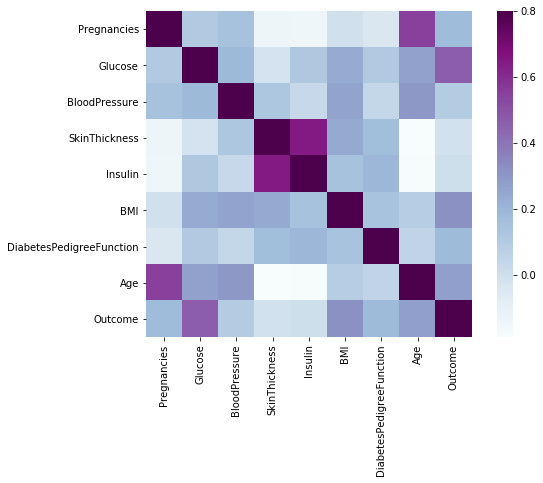

In [27]:
# Print correlation matrix
matrix = diabetes.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We have good number of independent varibales which are having less correlation with each other. 

# Model Building

**Splitting test train **

In [28]:
# Split data for independent and target varibale.
X = diabetes.loc[:, diabetes.columns != 'Outcome']
y = diabetes['Outcome']

In [29]:
# Train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=diabetes['Outcome'], random_state=0)

In [30]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 ## **Logistic regression**

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier = classifier.fit(X_train, y_train)
# Checking default parameters
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[110,  15],
       [ 28,  39]], dtype=int64)

In [34]:
print("Training set accuracy: {:.3f}".format(classifier.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(classifier.score(X_test, y_test)))

Training set accuracy: 0.771
Test set accuracy: 0.776


The default value of C=1 provides with ~77.1% accuracy on the training and ~77.6% accuracy on the test set, which is underfitting situation as the train and test results are close to each other.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.72      0.58      0.64        67

   micro avg       0.78      0.78      0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



Let's check for other low and high Values for C parametre.

In [67]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.762
Test set accuracy: 0.750


In [85]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.773
Test set accuracy: 0.776


Using C = 0.01 results in lower accuracy on both the training and the test sets.

Using C = 100 results in a little bit higher accuracy on training set little bit lower accuracy on test set, confirming that less regularization and a more complex model may not generalize better than default setting.

Therefore, we should choose default value C=1.

Finally, let’s look at the coefficients learned by the models with the three different settings of the regularization parameter C.

Stronger regularization (C=0.001) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can also see that feature “DiabetesPedigreeFunction”, for C=100, C=1 and C=0.001, the coefficient is positive. This indicates that high “DiabetesPedigreeFunction” feature is related to a sample being “diabetes”, regardless which model we look at.

In [54]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
param_grid = {'C': np.power(10.0, np.arange(-10, 10))}

In [62]:
# instantiate the grid
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [86]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [87]:
grid.best_score_, grid.best_params_

(0.76953125, {'C': 100.0})

Here, We got the best accuracy as 76.95% with the "C" value of 100.

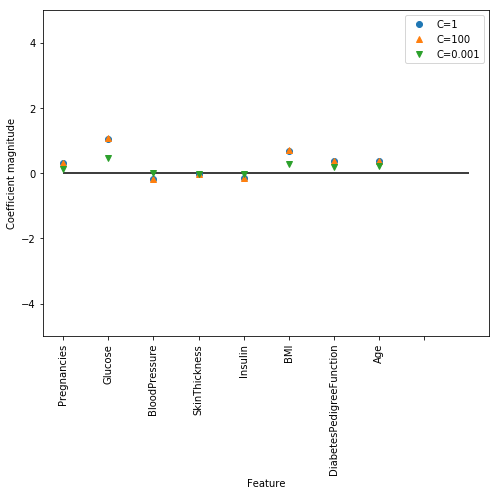

In [69]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

plt.figure(figsize=(8,6))
plt.plot(classifier.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

### **Logistic Regression : Stratified k-fold cross validation are used in case of logistic regression problems**

In [22]:
# Importing packages for cross validation and logistic regression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [99]:
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression(C = 100)
scores = cross_val_score(classifier , X, y, cv=5, scoring='accuracy')
print(scores)

[0.75974026 0.74675325 0.75324675 0.81699346 0.75163399]


In [96]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7656735421441304


Here, we got 76.6% accuracy which is the average of 5-folds for which we did cross varidation.

Tried for 10-folds also but got nearly same accuracy.

# k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”


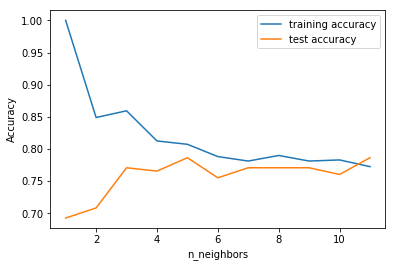

In [100]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 12)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 11 neighbors.

The above plot suggests that we should choose n_neighbors = 11. Here we are:


In [101]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.79


79% accuracy is achieved on test set in K-NN model, while it is performing low at train dataset 77% accuracy

# Decision Tree

In [214]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.760


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth and min_samples_split, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [216]:
from sklearn.model_selection import GridSearchCV

In [294]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and  
# min_samples_split from 1 to 100 with an interval of 10 

paramgrid = {'max_depth': list(range(1, 20, 2)),'min_samples_split': list(range(10, 100, 10)) }

In [295]:
# instantiate and fit the grid
tree = DecisionTreeClassifier(random_state=0)
grid_search=GridSearchCV(tree,paramgrid, scoring= 'accuracy',cv =5,return_train_score=False)

In [296]:
# fit the grid with data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [297]:
# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.75
{'max_depth': 9, 'min_samples_split': 30}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [3]:
tree = DecisionTreeClassifier(max_depth=9,min_samples_split=60,random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

NameError: name 'X_train' is not defined

We have decreased the accuracy on train set and increased test set accuracy to 79.2 % , preventing overfitting

**Feature importance in Decision trees**

Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:


In [31]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04172001 0.50465865 0.072224   0.         0.         0.15058849
 0.09173624 0.13907261]


 **Feature importance in Decision Tree**

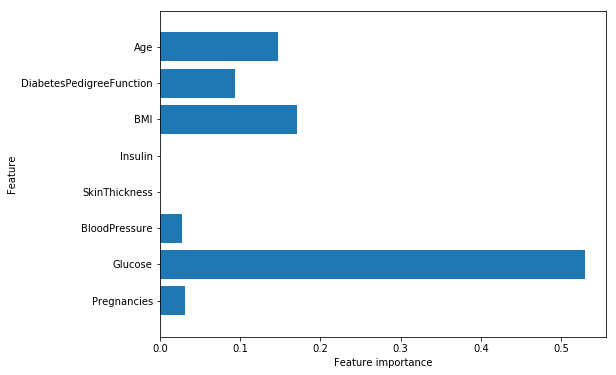

In [284]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

Feature "Glucose" is by far the most important feature.

# Random Forest

let’s apply a random forest consisting of 100 trees on the diabetes dataset:

In [202]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.792


The random forest gives us an accuracy of 79.2%, better than the logistic regression model or a single decision tree, without tuning any parameters. 

However, we can adjust the max_features setting, to see whether the result can be improved.

In [124]:
from sklearn.model_selection import GridSearchCV

In [351]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [303]:
# instantiate and fit the grid
rfc = RandomForestClassifier(random_state=1)
grid_search=GridSearchCV(rfc,paramgrid, scoring= 'accuracy',return_train_score=False)

In [304]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181], 'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [305]:
# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.7708333333333334
{'max_depth': 13, 'min_samples_split': 20, 'n_estimators': 161}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=161, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


AS the results at 'max_depth': 5, 'n_estimators': 81 have not shown good accuracy,

we tuned other parametres to get good accuracy and prevent overfitting.


In [349]:
rf1 = RandomForestClassifier(max_depth=11, n_estimators=61,min_samples_split=2, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.807


Here, We have increased our accuracy to 80.7%, at parametres : max_depth=11, n_estimators=61

But the problem of overfitting can be seen again.

# Support Vector Machine

In [103]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.79


The model overfits quite substantially, with a 80% score on the training set and only 79% accuracy on the test set.

In [121]:
# Changing 'C' parametre as gridsearchCV was taking very much time.
svc = SVC(C=10)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.877
Accuracy on test set: 0.802


Here, increasing C at C=10 allows us to improve the model, resulting in 80.2% test set accuracy also with a increase in train  score 87.7%.

**Using Kernel SVM**

When kernel is 'linear' test score is 78% and accuracy decreased in train score. So, we require some non-linear hyperplane classifier. 

In [122]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc = SVC(kernel = 'poly',degree=3,random_state = 0, C=10)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.82
Accuracy on test set: 0.81


When kernel is 'poly' test score is 81% with degree = 3 ,and C=10 with little bias in model, but at higher degrees it is showing overfitting,  

# Gradient Boosting

In [352]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.932
Accuracy on test set: 0.802


We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [353]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.797
Accuracy on test set: 0.776


In [354]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.786
Accuracy on test set: 0.781


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set.

We can visualize the feature importances to get more insight into our model even though we are not really happy with the model.

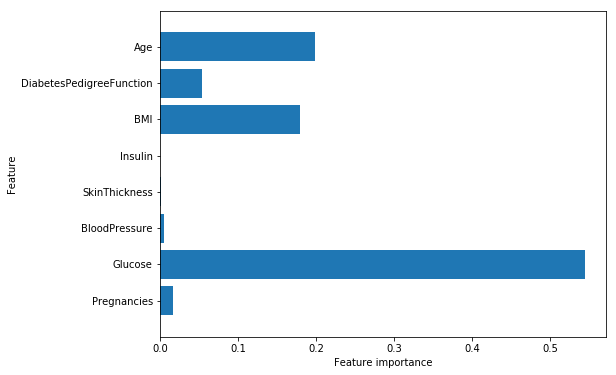

In [355]:
plot_feature_importances_diabetes(gb1)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

# Conclusion :

***Finally our Model is able to predicted 81% accurately whether the patient is likely to have diabetes or not when tested on test data, which is quite good.***
